In [1]:
using FileIO
using CUDA
using CUDA.CUFFT
using Plots

In [2]:
w(x) = reshape(x,128,125);
g(x) = CuArray(x);
ℱ(x) = rfft(x,1);
invℱ(x) = irfft(x,128,1);
H(x) = heatmap(collect(x));
interleave(c,s) = reshape(cat(c,s,dims=1),size(c,1),2*size(c,2));
deinterleave(x) = x[:,1:2:end] + 1im*x[:,2:2:end];
mean(x) = sum(x) / length(x);
mse(x,x̂) = mean( (x-x̂) .^ 2 );

In [3]:
x = load("data/mini_speech_commands/down/004ae714_nohash_0.wav")
x₀= Float32.(collect(x));

In [4]:
@time CUDA.@time begin
    𝐗 = (ℱ ∘ w ∘ g)(x₀);
    J = interleave(real(𝐗),imag(𝐗));
    x̂ = collect((invℱ ∘ deinterleave)(J)[:])
end;

 27.138197 seconds (50.03 M CPU allocations: 2.542 GiB, 3.22% gc time) (14 GPU allocations: 758.789 KiB, 0.00% memmgmt time)
 28.192218 seconds (51.05 M allocations: 2.593 GiB, 3.10% gc time, 54.62% compilation time: 2% of which was recompilation)


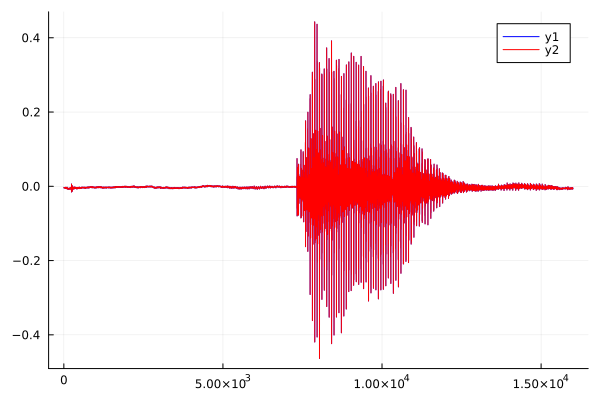

In [5]:
plot(x₀,c=:blue)
plot!(x̂,c=:red)

In [6]:
mse(x₀, x̂)

5.324085f-17